In [ ]:
using DataFrames
using CSV
using LinearAlgebra
using Plots

In [ ]:
#Q1, Minh
function linreg(x, y, lambda)
    m, n = size(x)
    z = x' * x + lambda * Matrix(I, n, n)  # the regularized matrix1
    lin_reg_param = inv(z) * x' * y
    return lin_reg_param
end


In [ ]:
# Tu Pham
# Questions 2, 3 (linreg)
# Function to calculate predicted responses
function predict(linregparam, x)
    predicted_responses = x * linregparam
    return predicted_responses
end

# Function to calculate R^2
function rsq(predicted_responses, true_responses, mean_prediction)
    predictive_model_error = 0
    for i in eachindex(trueResponses)
        predictive_model_error += ((true_responses[i] - predicted_responses[i]) ^ 2)
    end
    baseline_model_error = 0
    for i in eachindex(trueResponses)
        baseline_model_error += ((true_responses[i] - mean_prediction) ^ 2)
    end
    r_squared = 1 - (predictive_model_error / baseline_model_error)
    return r_squared
end

In [ ]:
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)

In [ ]:
# Part 2, q123, Minh

# Q1 
filepath = "./usconsumption.csv"
df = CSV.read(filepath, DataFrame)
df[!, :Intercept] = ones(size(df, 1)) # create an Intercept column and fill it with 1s.

print(df)

In [ ]:
# Q2
x = df[:, "Quarter"]
rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]

plot(x, rpce, xlabel="Quarter", legend=true, label="RPCE")

# Q3
plot!(x, rpdi, xlabel="Quarter", legend=true, label="RPDI")
ylabel!("Rate of Change")

In [ ]:
# Tu Pham
# Code to prepare for 4, 5 (timeseries)
time_vector = df[:, "Quarter"]
real_RPCE = df[:, " Percent Change Consumption"]
real_RPDI = df[:, "Percent Change Income"]
intercept = df[:, "Intercept"]


RPDI_intercept_features = hcat(real_RPDI, intercept)
linregparam_with_RPDI_intercept = linreg(RPDI_intercept_features, real_RPCE , 0)

println("Weight for RPDI", linregparam_with_RPDI_intercept[1])
println("Intercept", linregparam_with_RPDI_intercept[2])

estimated_RPCE = predict(linregparam_with_RPDI_intercept, RPDI_intercept_features)
estimated_RPCE


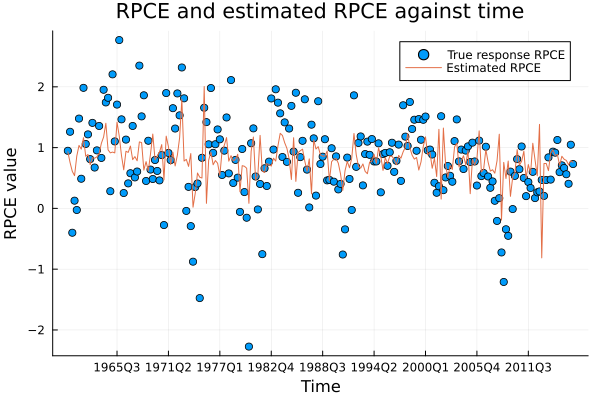

In [55]:
# Tu Pham
# Question 6 (timeseries)
# Plot RPCE and estimated RPCE against time
function plot_RPCE(real_RPCE, estimated_RPCE, time_vector)
    plot(time_vector, real_RPCE, seriestype=:scatter, label="True response RPCE")
    plot!(time_vector, estimated_RPCE, label="Estimated RPCE")
    xlabel!("Time")
    ylabel!("RPCE value")
    title!("RPCE and estimated RPCE against time")
end
plot_RPCE(real_RPCE, estimated_RPCE, time_vector)

In [ ]:
# Tu Pham
# Code to prepare for 7, 8 (timeseries)
# Unfinished
time_vector = Matrix(df[:, "Quarter"])
real_RPCE = df[:, " Percent Change Consumption"]
other_features = df[:, [3:7]]



In [57]:
#Q7, Minh

# Building a matrix of features from all other features
mat = Matrix(df[:, 3:7])
y = (df[:, 2])
# println(size(mat))

linreg_param = linreg(mat, y, 0)

# Printing result
# ? Which one will go first?
println("Weight for RPDI: $(linreg_param[1])")
println("Weight for IP: $(linreg_param[2])")
println("Weight for PS: $(linreg_param[3])")
println("Weight for UR: $(linreg_param[4])")
println("Intercept: $(linreg_param[5])")

Weight for RPDI: 0.7537050372353764
Weight for IP: 0.03166918728313159
Weight for PS: -0.04897556981461185
Weight for UR: -0.24245971511268483
Intercept: 0.2543022935236794


In [ ]:
#8, Matt

linregparam_with_other_intercept = linreg(other_features, real_RPCE , 0)
etimated_RPCE = predict(linregparam_with_other_intercept, other_intercept_features)
# estimated_RPCE


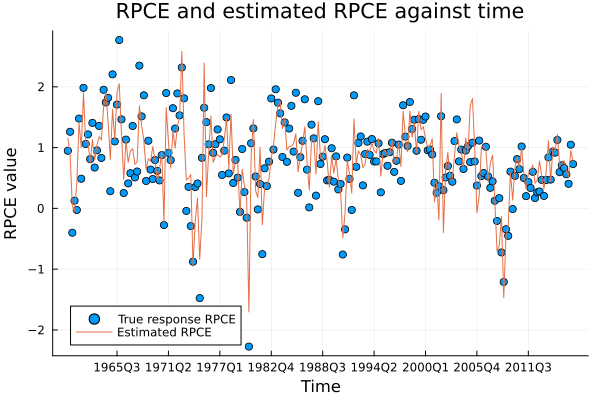

In [54]:
# Q9, Minh

est = predict(linreg_param, mat)
plot_RPCE(real_RPCE, est, time_vector)

In [65]:
# Q10, Minh
importance_dict = Dict("RPDI" => linreg_param[1], "IP" => linreg_param[2], "PS" => linreg_param[3], "UR" => linreg_param[4], "Intercept" => linreg_param[5])

# Turning into absolute values
for key in keys(importance_dict)
    importance_dict[key] = abs(importance_dict[key])
end

names = collect(keys(importance_dict)) # Convert KeySet to an array of names
weight = collect(values(importance_dict))

sorted_importance = sortperm(weight, rev = true)

sorted_attr = names[sorted_importance]

# Print the sorted names and values with rank of importance
for index in 1:length(sorted_attr)
    println("$index. $(sorted_attr[index])")
end


1. RPDI
2. Intercept
3. UR
4. PS
5. IP
